# 문제 상황에 대한 분석, 관련 데이터를 확보한 뒤의 문제에 대해

## 10. 1차원 데이터의 탐색

> 요약 통계치 계산의 필요성이 있다. 개수, 최솟값 최댓값 평균 표준편차

> 허나 위의 단순 수치들이 별 의미가 없을 수 있다 . 그럴때는 구간을 쪼개고 구간 내 데이터 분포를 파악하는 
히스토그램을 그려보자

In [1]:
from collections import Counter, defaultdict
from functools import partial, reduce
from linear_algebra import shape, get_row, get_column, make_matrix, \
    vector_mean, vector_sum, dot, magnitude, vector_subtract, scalar_multiply
from stats import correlation, standard_deviation, mean
from probability import inverse_normal_cdf
from gradient_descent import maximize_batch
import math, random, csv
import matplotlib.pyplot as plt
import dateutil.parser

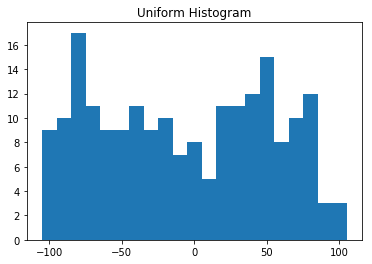

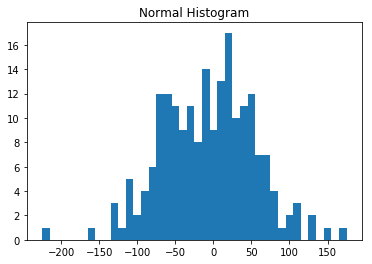

In [4]:
def bucketize(point, bucket_size) :
    """각 데이터를 bucket_ize의 배수에 해당하는 구간에 위치시킨다."""
    return bucket_size*math.floor(point / bucket_size)

def make_histogram(points, bucket_size):
    """구간을 생성하고 각 구간 내 데이터 개수를 계산해 준다"""
    return Counter(bucketize(point, bucket_size) for point in points )

def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()
    
def compare_two_distributions():

    random.seed(0)
    # -100과 100사이 균등분포
    uniform = [random.randint(-100,101) for _ in range(200)]
    # 평균 0이고 표편 57인 정규분포
    normal = [57 * inverse_normal_cdf(random.random())
              for _ in range(200)]

    plot_histogram(uniform, 10, "Uniform Histogram")
    plot_histogram(normal, 10, "Normal Histogram")
compare_two_distributions()

## 10-2 2차원 데이터

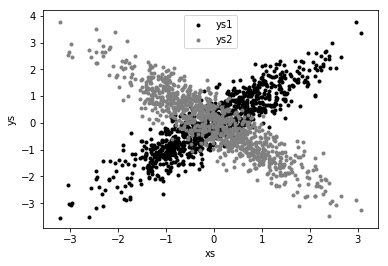

In [7]:
#데이터가 2종류인 경우에는 어떤식으로 그려봐야하나
#밑은 둘 사이의 상관관계를 그려보는 코드 형식이다.


#data 예시
def random_normal():
    """표준 정규 분포 데이터들"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal()  /2 for x in xs]
ys2 = [-x + random_normal() /2 for x in xs]

# 그래프 도안 
def scatter():
    plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
    plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
    plt.xlabel('xs')
    plt.ylabel('ys')
    plt.legend(loc=9)
    plt.show()
scatter()


## 10-3. 다차원 데이터